Data ready. Input shape: (17631, 30, 14)


/Users/hossein/.pyenv/versions/3.9.18/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 128)        │        73,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,737 (487.25 KB)

 Trainable params: 124,737 (487.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 5381.5747 - mae: 62.3854 - val_loss: 1829.6176 - val_mae: 38.6743
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1750.6196 - mae: 37.0221 - val_loss: 1795.1096 - val_mae: 38.1221
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1740.5488 - mae: 36.8098 - val_loss: 1819.3182 - val_mae: 38.5294
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1779.5858 - mae: 37.4257 - val_loss: 1806.3979 - val_mae: 38.3281
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1750.2932 - mae: 36.9174 - val_loss: 1818.6593 - val_mae: 38.5198
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1790.2777 - mae: 37.4842 - val_loss: 1792.6483 - val_mae: 38.1415
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1409.1412 - mae: 32.3199 - val_loss: 322.1693 - val_mae: 14.5118
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 375.2335 - mae: 15.0759 - val_loss: 296.3773 - val_

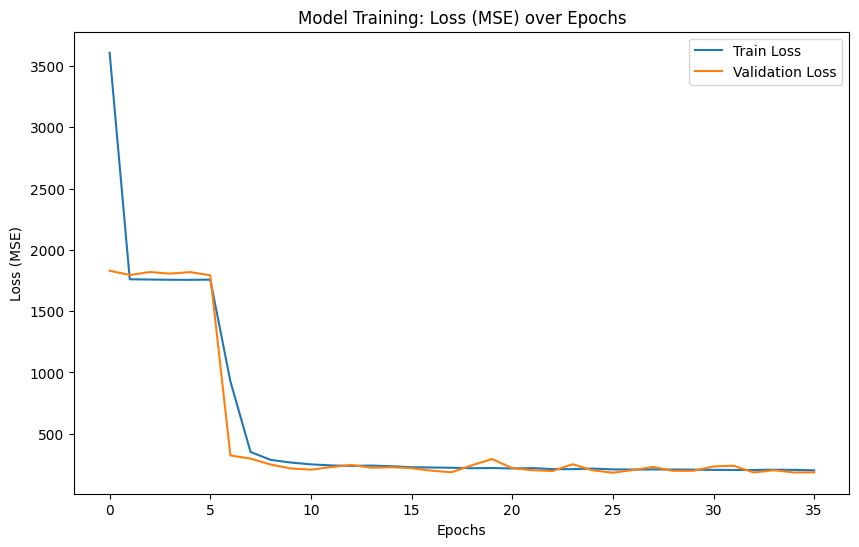

Model saved successfully!


In [5]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

sys.path.append(os.path.abspath('../src'))

from data_process import load_data, process_targets, scale_data, make_sequences
from model import build_lstm_model

TRAIN_PATH = '../data/train_FD001.txt'
TEST_PATH = '../data/test_FD001.txt'
RUL_PATH = '../data/RUL_FD001.txt'

train_df, test_df, rul_truth = load_data(TRAIN_PATH, TEST_PATH, RUL_PATH)
train_df = process_targets(train_df)
train_df, test_df, scaler = scale_data(train_df, test_df)

SEQ_LENGTH = 30
X_train, y_train = make_sequences(train_df, seq_length=SEQ_LENGTH)

print("Data ready. Input shape:", X_train.shape)

input_shape = (X_train.shape[1], X_train.shape[2])
model = build_lstm_model(input_shape)
model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,        
    batch_size=64, 
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training: Loss (MSE) over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

model.save('../models/lstm_rul_v1.h5')
print("Model saved successfully!")